In [1]:
from qiskit import QuantumCircuit, transpile
# from qiskit.providers.aer import QasmSimulator
# from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeManila, FakeToronto
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
from scipy.signal import savgol_filter
from numpy.random import Generator, PCG64
import os
import sys

module_path = os.path.abspath(os.path.join('..')) # qrc_surrogate
sys.path.append(module_path)
fig_path = f'{module_path}/figs'


from src.feedforward import QExtremeLearningMachine, CPolynomialFeedforward
from src.rewinding import QRewindingRC, QRewindingStatevectorRC
from src.data import DataSource

In [2]:
# np.set_printoptions(
#     suppress=False,
#     precision=4,
#     formatter={'float_kind':'{:.3e}'.format},
# ) 

# NARMA: nonlinear autoregressive moving average task

- New results on recurrent network training: unifying the algorithms and accelerating convergence
- A comparative study of reservoir computing for temporal signal processing

## With random input

- Reservoir Computing Beyond Memory-Nonlinearity Trade-off
- Novel nondelay-based reservoir computing with a single micromechanical nonlinear resonator for high-efficiency information processing

input x(t) is generated from a uniform density in [0,0.5]


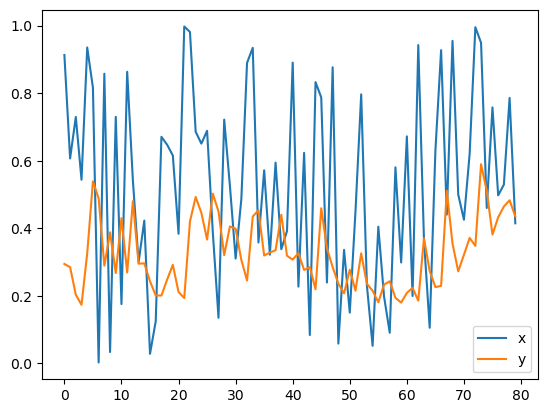

In [3]:
data = DataSource(nepisodes=2, xtype='narma', ytype='narma', memory=5, rseed_data=0)

e = 0
plt.plot(data.xtrain[e], label='x')
plt.plot(data.ytrain[e], label='y')
plt.legend()
plt.show()

## With smooth input

- Reservoir Computing via Quantum Recurrent Neural Networks

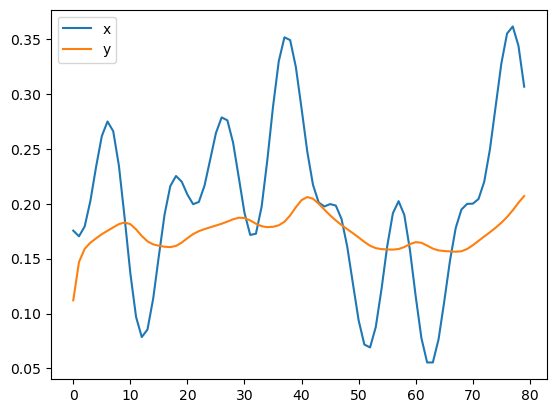

In [4]:
data = DataSource(nepisodes=2, xtype='narma_smooth', ytype='narma_smooth', memory=5, rseed_data=0)

e = 0
plt.plot(data.xtrain[e], label='x')
plt.plot(data.ytrain[e], label='y')
plt.legend()
plt.show()

# Narma solved

In [6]:
rseed = np.random.randint(10**3)

## Random

mse_train:      2.3073e-03
mse_val:        2.1224e-03
corr_train:     7.4533e-01
corr_val:       7.9548e-01


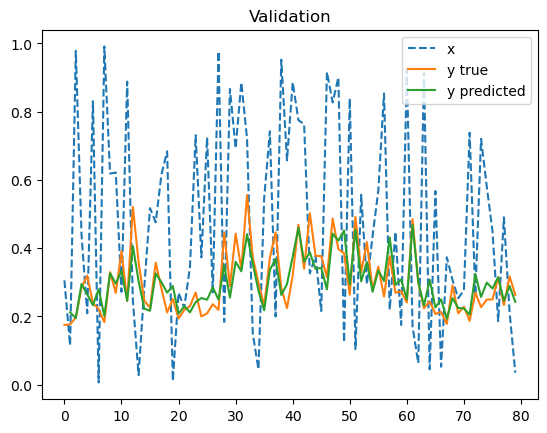

In [7]:
data = DataSource(xtype='narma_random', ytype='narma_random', xnorm='norm', ynorm='norm', memory=5, rseed_data=rseed)

base = CPolynomialFeedforward(poly_degree=3, lookback=5, regression_model='ridge', regression_alpha=0.001,)
base.run(data)

base.print_results()

# base.plot_train(px=True, nepisodes=1)
base.plot_val(px=True, nepisodes=1)

mse_train:      2.6450e-03
mse_val:        2.9800e-03
corr_train:     7.0810e-01
corr_val:       7.1949e-01


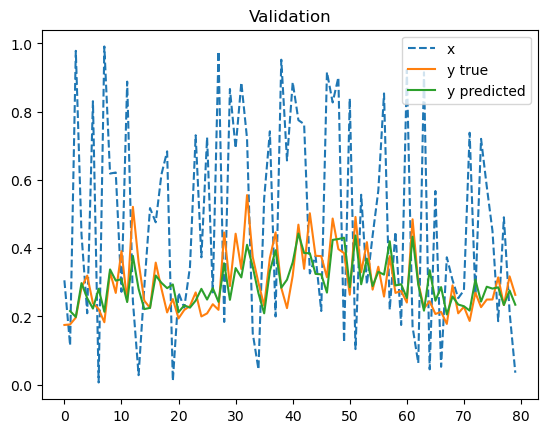

In [8]:
data = DataSource(xtype='narma_random', ytype='narma_random', xnorm='norm', ynorm='norm', memory=5, rseed_data=rseed)

nqubits = 5
lookback = nqubits - 2

qrff = QExtremeLearningMachine(
    nqubits=nqubits,  nmeasax=3, lookback=lookback, qctype='ising', ftype='all',
    rseed=rseed, regression_model='ridge',
)
qrff.run(data)

qrff.print_results()

# qrff.plot_train(nepisodes=1)
qrff.plot_val(nepisodes=1)
# qrff.qc.draw('mpl')

# etrain, eval = qrff.worst_episodes()

In [9]:
# data = DataSource(xtype='narma_random', ytype='narma_random', xnorm='norm', ynorm='norm', memory=5, rseed_data=rseed)

# nqubits = 5
# shots = 2**13

# qrff = QOnlineReservoir(
#     nqubits=nqubits, nmeasax=3, qctype='ising', ftype='all',
#     rseed=rseed, regression_model='ridge',
# )
# qrff.run(data)

# qrff.print_results()

# # qrff.plot_train(nepisodes=1)
# qrff.plot_val(nepisodes=1)
# # qrff.qc.draw('mpl')

# # etrain, eval = qrff.worst_episodes()

In [10]:
# data = DataSource(xtype='narma_random', ytype='narma_random', xnorm='norm', ynorm='norm', memory=5, rseed_data=rseed)

# nqubits = 5
# lookback = nqubits - 2
# shots = 2**13

# qrff = QRewindingRC(
#     nqubits=nqubits, nmeasax=3, lookback=lookback, qctype='ising', ftype='all',
#     rseed=rseed, regression_model='ridge',
# )
# qrff.run(data)

# qrff.print_results()

# # qrff.plot_train(nepisodes=1)
# qrff.plot_val(nepisodes=1)
# # qrff.qc.draw('mpl')

# # etrain, eval = qrff.worst_episodes()

In [11]:
# data = DataSource(xtype='narma_random', ytype='narma_random', xnorm='norm', ynorm='norm', memory=5, rseed_data=rseed)

# nqubits = 5
# lookback = nqubits - 2
# shots = 2**13

# qrff = QRewindingStatevectorRC(
#     nqubits=nqubits, nmeasax=3, lookback=lookback, qctype='ising', ftype='all',
#     rseed=rseed, regression_model='ridge',
# )
# qrff.run(data)

# qrff.print_results()

# # qrff.plot_train(nepisodes=1)
# qrff.plot_val(nepisodes=1)
# # qrff.qc.draw('mpl')

# # etrain, eval = qrff.worst_episodes()

mse_train:      2.6308e-03
mse_val:        2.9162e-03
corr_train:     7.0962e-01
corr_val:       7.2189e-01
Train 0.16450405882016836, val 0.17136643170614788


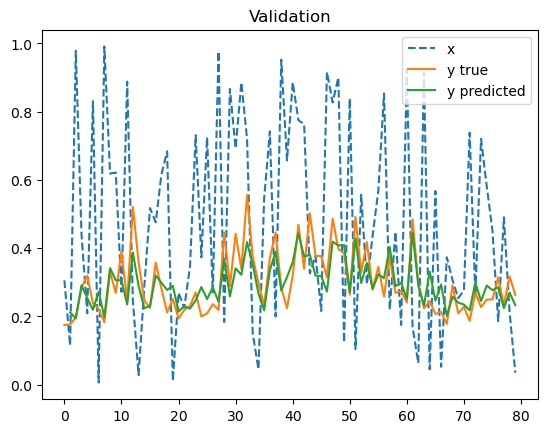

In [12]:
data = DataSource(xtype='narma_random', ytype='narma_random', xnorm='norm', ynorm='norm', memory=5, rseed_data=rseed)

nqubits = 5
lookback = nqubits - 2
shots = 2**13

qrff = QExtremeLearningMachine(
    nqubits=nqubits,  nmeasax=3, lookback=lookback, qctype='empty', ftype='all',
    rseed=rseed, regression_model='ridge',
)
qrff.run(data)

qrff.print_results()
print(f'Train {qrff.nrmse_train}, val {qrff.nrmse_val}')

# qrff.plot_train(nepisodes=1)
qrff.plot_val(nepisodes=1)
# qrff.qc.draw('mpl')

# etrain, eval = qrff.worst_episodes()

## Smooth

mse_train:      1.6153e-05
mse_val:        3.4263e-05
corr_train:     9.1480e-01
corr_val:       8.1761e-01
Train 0.02290786910543027, val 0.03348325830525475


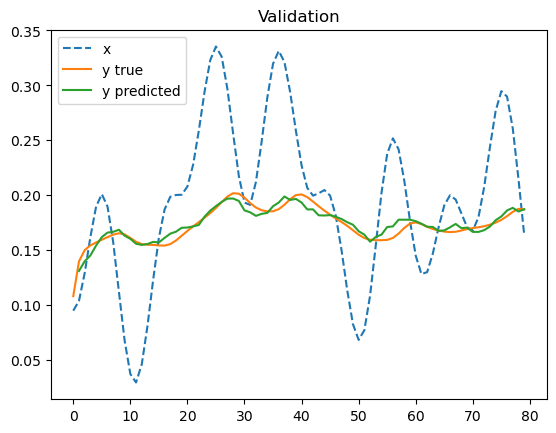

In [13]:
data = DataSource(xtype='narma_smooth', ytype='narma_smooth', xnorm='norm', ynorm='norm', memory=5, rseed_data=rseed)

nqubits = 5
lookback = nqubits - 2
shots = 2**13

qrff = QExtremeLearningMachine(
    nqubits=nqubits,  nmeasax=3, lookback=lookback, qctype='ising', ftype='all',
    rseed=rseed, regression_model='ridge',
)
qrff.run(data)

qrff.print_results()
print(f'Train {qrff.nrmse_train}, val {qrff.nrmse_val}')

# qrff.plot_train(nepisodes=1)
qrff.plot_val(nepisodes=1)
# qrff.qc.draw('mpl')

# etrain, eval = qrff.worst_episodes()

mse_train:      8.5341e-06
mse_val:        2.4506e-05
corr_train:     9.5465e-01
corr_val:       8.6951e-01
Train 0.016650748958284712, val 0.02831729097279878


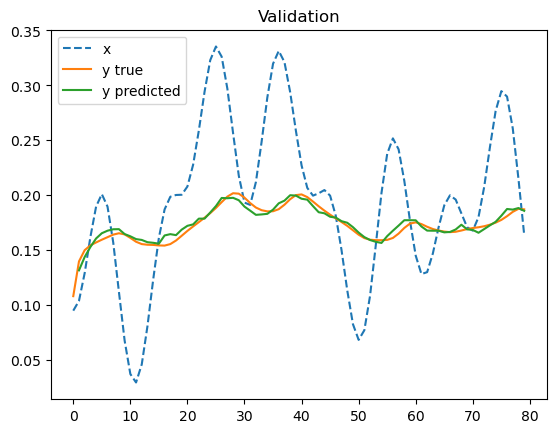

In [14]:
data = DataSource(xtype='narma_smooth', ytype='narma_smooth', xnorm='norm', ynorm='norm', memory=5, rseed_data=rseed)

nqubits = 5
lookback = nqubits - 2
shots = 2**13

qrff = QExtremeLearningMachine(
    nqubits=nqubits,  nmeasax=3, lookback=lookback, qctype='empty', ftype='all',
    rseed=rseed, regression_model='ridge',
)
qrff.run(data)

qrff.print_results()
print(f'Train {qrff.nrmse_train}, val {qrff.nrmse_val}')

# qrff.plot_train(nepisodes=1)
qrff.plot_val(nepisodes=1)
# qrff.qc.draw('mpl')

# etrain, eval = qrff.worst_episodes()